In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as  xgb 
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')

In [3]:
with open("C:/Users/Aadi Bhardwaj/Desktop/House Price Dataset/new.csv","rb") as f:
    result=chardet.detect(f.read(100000))
print(result)

{'encoding': 'GB2312', 'confidence': 0.99, 'language': 'Chinese'}


In [4]:
data = pd.read_csv("C:/Users/Aadi Bhardwaj/Desktop/House Price Dataset/new.csv",encoding="GB2312")
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [5]:
data.shape

(318851, 26)

In [6]:
df0=data.copy()

In [7]:
data.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [9]:
data.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

In [10]:
#Drop 'DOM' Columns
data.drop(columns=['DOM'],axis=1,inplace=True)

In [11]:
data.isnull().sum()

url                       0
id                        0
Lng                       0
Lat                       0
Cid                       0
tradeTime                 0
followers                 0
totalPrice                0
price                     0
square                    0
livingRoom                0
drawingRoom               0
kitchen                   0
bathRoom                  0
floor                     0
buildingType           2021
constructionTime          0
renovationCondition       0
buildingStructure         0
ladderRatio               0
elevator                 32
fiveYearsProperty        32
subway                   32
district                  0
communityAverage        463
dtype: int64

In [12]:
data['buildingType'].fillna(data.buildingType.mode(),inplace=True)
data.elevator.fillna(data.elevator.mode(),inplace=True)
data.fiveYearsProperty.fillna(data.fiveYearsProperty.mode(),inplace=True)
data.subway.fillna(data.subway.median(),inplace=True)
data.communityAverage.fillna(data.communityAverage.median(),inplace=True)

In [14]:
def Trade_Time(x):
    return x[0:4]
data['tradeTime']=data['tradeTime'].apply(Trade_Time)
data.head()

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016,106,415.0,31680,131.00,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016,126,575.0,43436,132.38,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016,48,1030.0,52021,198.00,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016,138,297.5,22202,134.00,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016,286,392.0,48396,81.00,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [15]:
#convert tradetime into int numeric
data['tradeTime'] = pd.to_numeric(data['tradeTime'])
data['livingRoom'] = data['livingRoom'].apply(pd.to_numeric, errors='coerce')
data['drawingRoom'] = data['drawingRoom'].apply(pd.to_numeric, errors='coerce')
data['bathRoom'] = data['bathRoom'].apply(pd.to_numeric, errors='coerce')
#convert ConstructionTime into int numeric
data['constructionTime'] = data['constructionTime'].apply(pd.to_numeric, errors='coerce')


In [16]:
data.livingRoom.unique()

array([ 2.,  3.,  1.,  4.,  5.,  6.,  9.,  0.,  7.,  8., nan])

In [17]:
#Now,Split the column into a Floor_Type and Floor_Height
def Floor_Type(x):
    return x.split(' ')[0]

def Floor_Height(y):
    try:
        return int(y.split(' ')[1])
    except:
        return np.nan

data['floor_type']=data['floor'].apply(Floor_Type)    
data['floor_height']=data['floor'].apply(Floor_Height)

In [18]:
data=data.drop(columns=['floor','url','id','Cid','price','floor_type'])
data.head()

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floor_height
0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,1,1.0,...,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,26.0
1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,1,2.0,...,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,22.0
2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,1,3.0,...,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,4.0
3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,1,1.0,...,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,21.0
4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,1,1.0,...,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,6.0


In [19]:
#Removing unnecessary data which is present in buildingType
data=data[data['buildingType']>=1]

In [20]:
print(data.buildingType.unique())
print(data.shape)

[1. 4. 3. 2.]
(316798, 21)


In [21]:
data=data.dropna(axis=0)

**EDA**

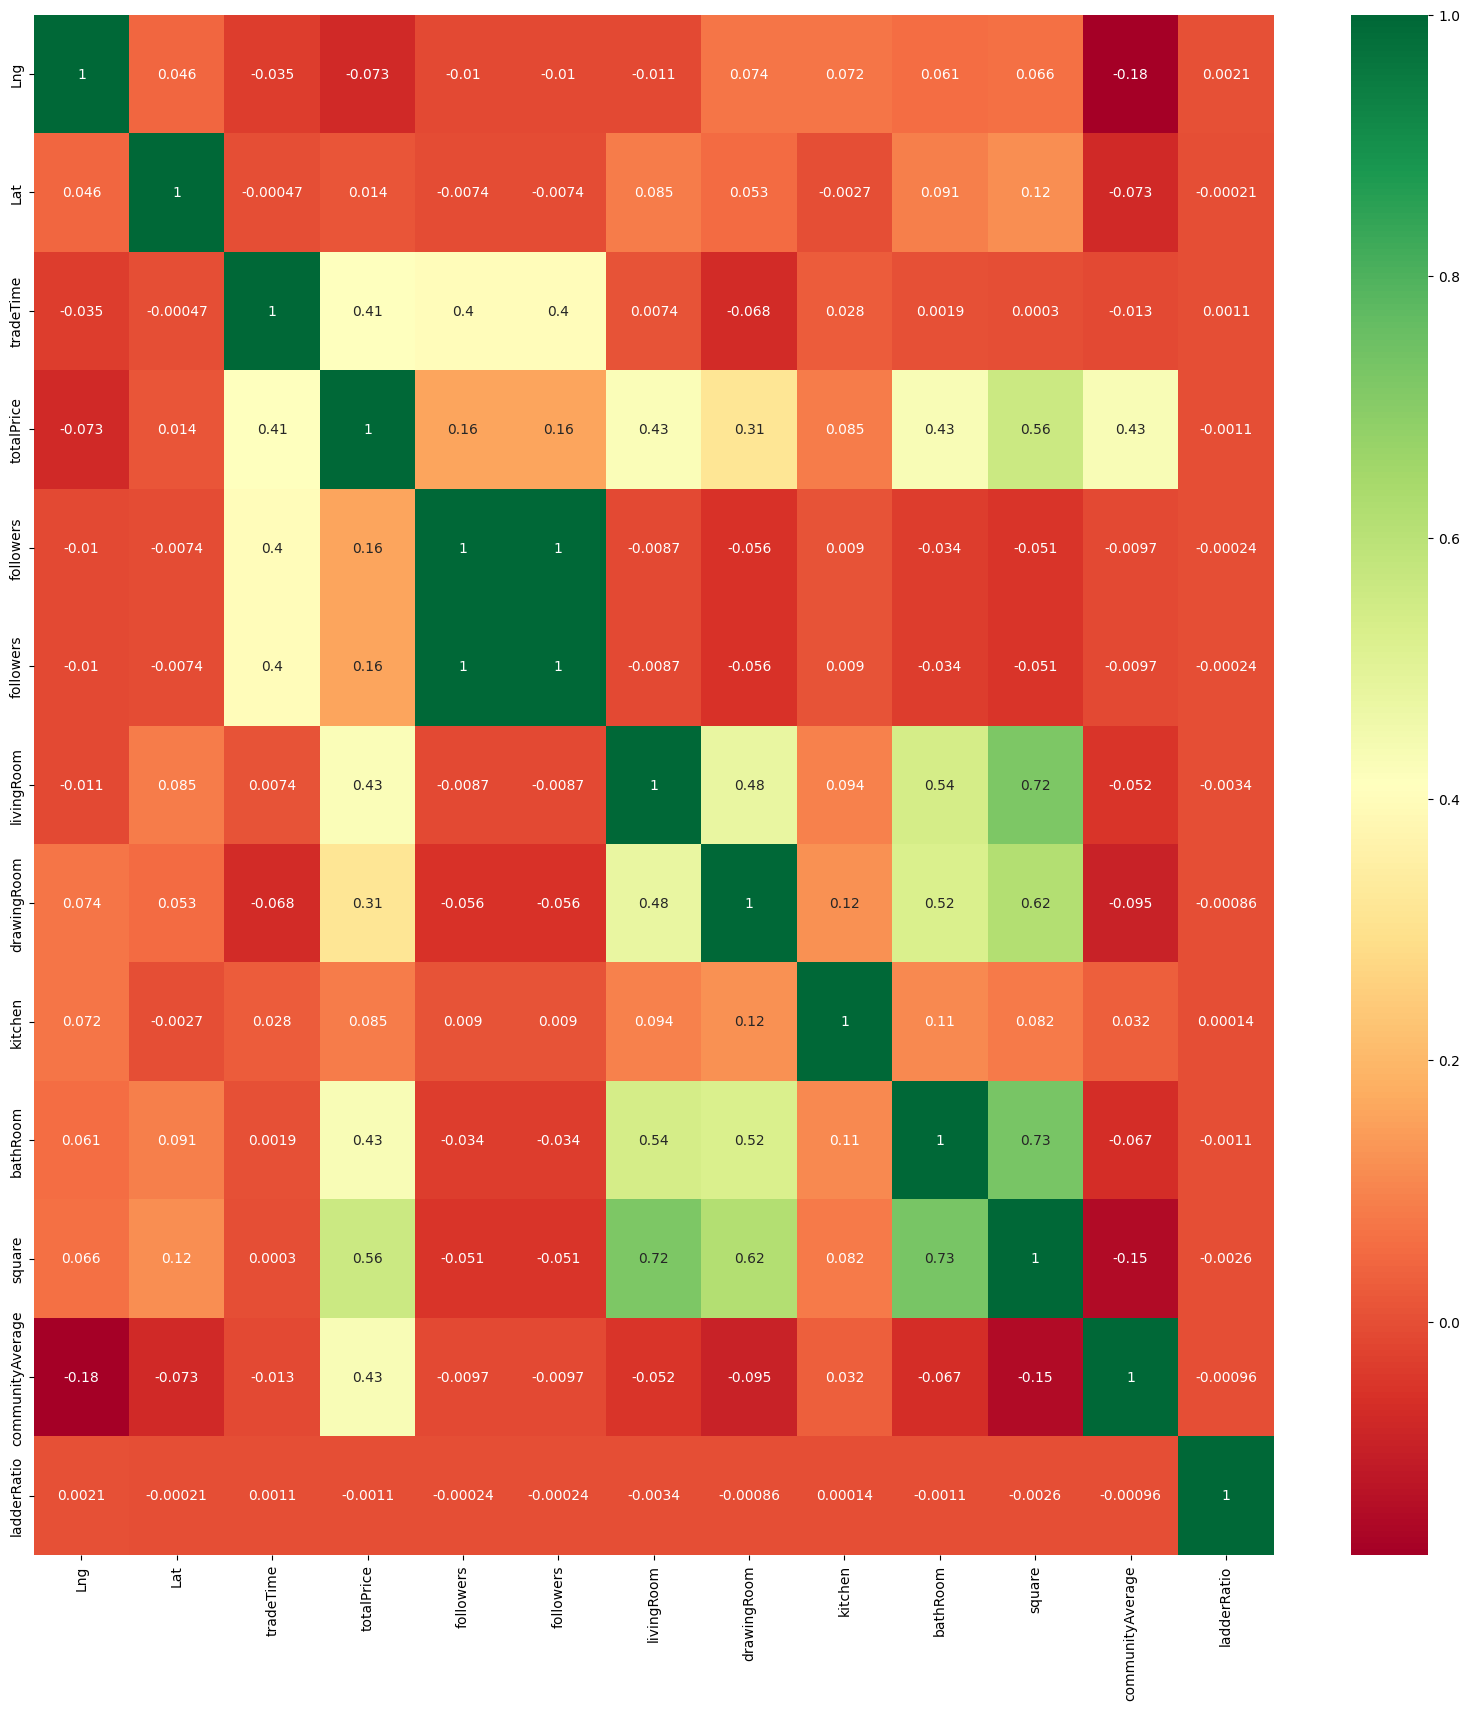

In [22]:
df1=data[['Lng','Lat','tradeTime','totalPrice','followers','followers','livingRoom','drawingRoom','kitchen',
    'bathRoom','square','communityAverage','ladderRatio']]
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap = "RdYlGn")
plt.show()

KeyboardInterrupt: 

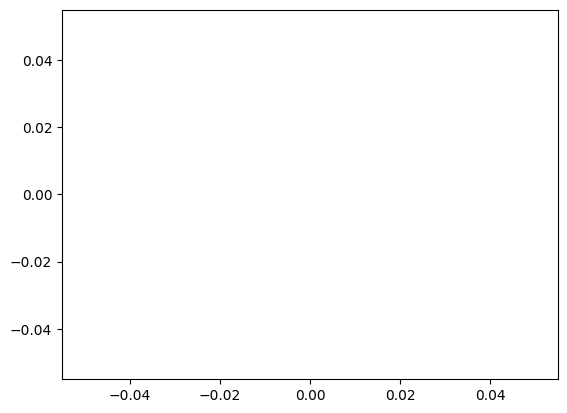

In [23]:
sns.kdeplot(data=data['totalPrice'],shade=True)

In [ ]:
data.to_csv("C:/Users/Aadi Bhardwaj/Desktop/House Price Dataset/After_EDA.csv")

**AFTER EDA**

In [ ]:
data = pd.read_csv("C:/Users/Aadi Bhardwaj/Desktop/House Price Dataset/After_EDA.csv")

<Axes: ylabel='totalPrice'>

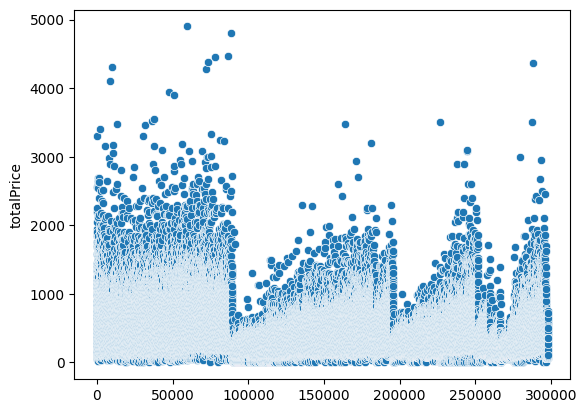

In [ ]:
sns.scatterplot(data=data['totalPrice'])

In [ ]:
data['totalPrice'].describe()


count    297990.000000
mean        349.178136
std         224.530679
min           0.100000
25%         205.000000
50%         295.000000
75%         427.000000
max        4900.000000
Name: totalPrice, dtype: float64

In [ ]:
#Another method to findout q1, q2 and q3
data.totalPrice.quantile([0.25,0.50,0.75])

0.25    205.0
0.50    295.0
0.75    427.0
Name: totalPrice, dtype: float64

In [ ]:
Q1=205
Q3=428
IQR=Q3-Q1
print("So,IQR of our totalPrice Features is",IQR)

So,IQR of our totalPrice Features is 223


In [ ]:
#Let's Calculate the High and Low Value in a totalPrice Features
High=Q3+1.5*IQR
Low=Q1-1.5*IQR
print("High value of our totalPrice Features is",High)
print("Low value of our totalPrice Features is",Low)

High value of our totalPrice Features is 762.5
Low value of our totalPrice Features is -129.5


In [ ]:
df=data.copy()

In [ ]:
#Let's remove the outlier
df=df[df['totalPrice']<=High]
df=df[df['totalPrice']>=Low]

<Axes: ylabel='totalPrice'>

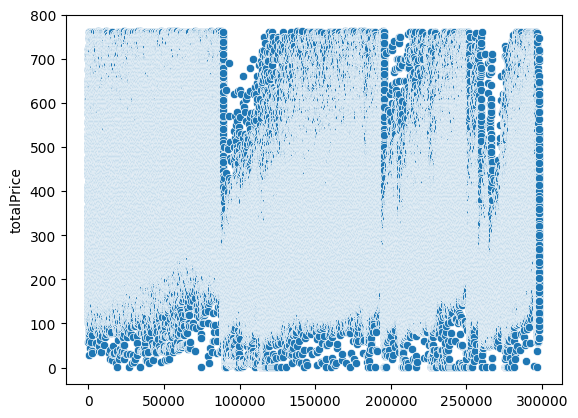

In [ ]:
sns.scatterplot(data=df['totalPrice'])


In [ ]:
print(data.shape)
print(df.shape)

(297990, 22)
(283901, 22)


In [ ]:
print("Total outlier Removed =",data.shape[0]-df.shape[0])

Total outlier Removed = 14089


In [ ]:
X=df.drop(['totalPrice','Unnamed: 0'],axis=1)
y=df['totalPrice']
X

,Lng,Lat,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floor_height
0,116.475489,40.019520,2016,106,131.00,2.0,1.0,1,1.0,1.0,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,26.0
1,116.453917,39.881534,2016,126,132.38,2.0,2.0,1,2.0,1.0,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,22.0
3,116.438010,40.076114,2016,138,134.00,3.0,1.0,1,1.0,1.0,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,21.0
4,116.428392,39.886229,2016,286,81.00,2.0,1.0,1,1.0,4.0,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,6.0
5,116.466280,39.991363,2016,57,53.00,1.0,0.0,1,1.0,4.0,2005.0,3,6,0.333,1.0,1.0,0.0,7,67738.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297985,116.546899,39.755236,2016,8,134.20,3.0,2.0,1,2.0,3.0,2009.0,4,6,0.500,1.0,1.0,0.0,3,36545.0,9.0
297986,116.546899,39.755236,2016,8,170.07,3.0,2.0,1,2.0,4.0,2003.0,1,6,0.333,0.0,1.0,0.0,3,36545.0,5.0
297987,116.497474,39.810115,2016,1,35.09,1.0,0.0,1,1.0,1.0,2009.0,1,6,0.222,1.0,0.0,1.0,3,54282.0,24.0
297988,116.497256,39.804081,2016,2,102.17,2.0,2.0,1,2.0,4.0,2000.0,3,6,0.500,1.0,1.0,0.0,3,46927.0,7.0


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

KeyboardInterrupt: 

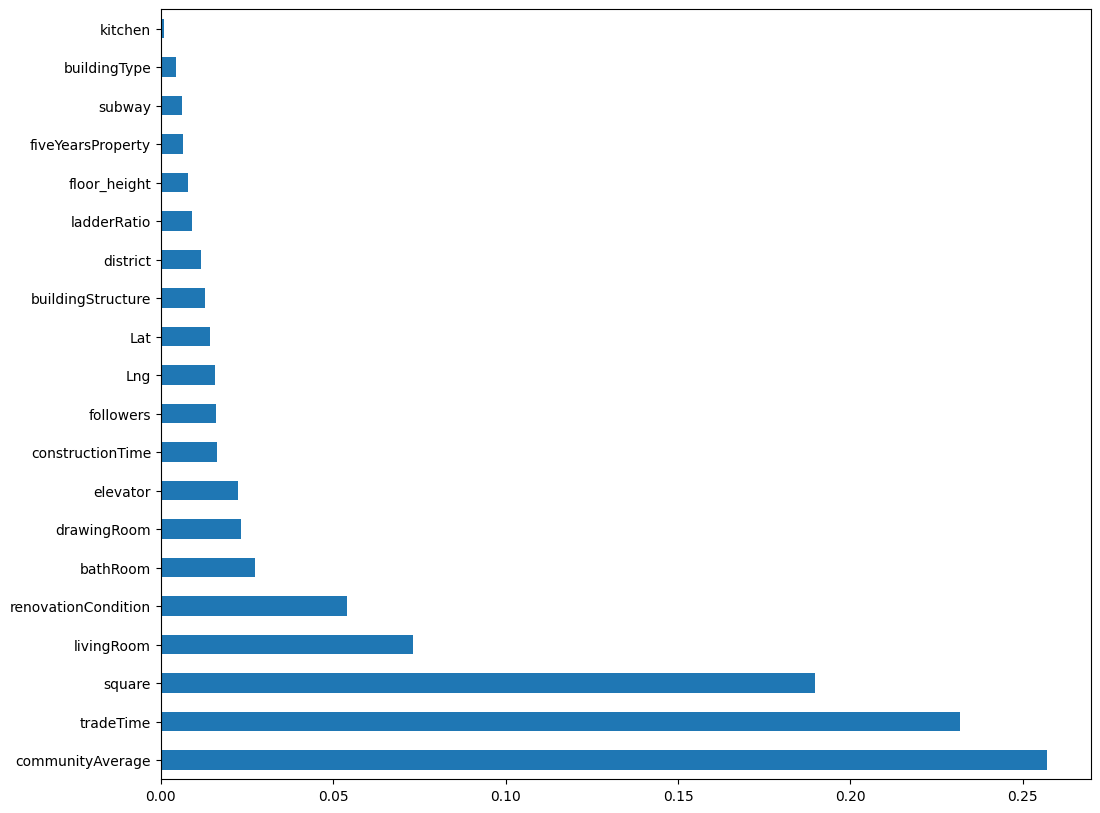

In [ ]:
plt.figure(figsize=(12,10))
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(30).plot(kind='barh')
plt.show()

**Data Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()

In [ ]:
col_for_normalization=['Lng', 'Lat','followers','square','livingRoom', 'drawingRoom', 'kitchen', 'bathRoom','ladderRatio', 'fiveYearsProperty', 'subway', 'communityAverage','floor_height']

In [ ]:
df[col_for_normalization]=scaling.fit_transform(df[col_for_normalization])

In [ ]:
data.to_csv("C:/Users/Aadi Bhardwaj/Desktop/House Price Dataset/Model_data.csv")

In [ ]:
data = pd.read_csv("C:/Users/Aadi Bhardwaj/Desktop/House Price Dataset/Model_data.csv")

In [ ]:
data.shape
data

,Unnamed: 0.1,Unnamed: 0,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,...,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floor_height
0,0,0,116.475489,40.019520,2016,106,415.0,131.00,2.0,1.0,...,2005.0,3,6,0.217,1.0,0.0,1.0,7,56021.0,26.0
1,1,1,116.453917,39.881534,2016,126,575.0,132.38,2.0,2.0,...,2004.0,4,6,0.667,1.0,1.0,0.0,7,71539.0,22.0
2,2,2,116.561978,39.877145,2016,48,1030.0,198.00,3.0,2.0,...,2005.0,3,6,0.500,1.0,0.0,0.0,7,48160.0,4.0
3,3,3,116.438010,40.076114,2016,138,297.5,134.00,3.0,1.0,...,2008.0,1,6,0.273,1.0,0.0,0.0,6,51238.0,21.0
4,4,4,116.428392,39.886229,2016,286,392.0,81.00,2.0,1.0,...,1960.0,2,2,0.333,0.0,1.0,1.0,1,62588.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297985,297985,318845,116.546899,39.755236,2016,8,355.5,134.20,3.0,2.0,...,2009.0,4,6,0.500,1.0,1.0,0.0,3,36545.0,9.0
297986,297986,318846,116.546899,39.755236,2016,8,350.0,170.07,3.0,2.0,...,2003.0,1,6,0.333,0.0,1.0,0.0,3,36545.0,5.0
297987,297987,318847,116.497474,39.810115,2016,1,108.8,35.09,1.0,0.0,...,2009.0,1,6,0.222,1.0,0.0,1.0,3,54282.0,24.0
297988,297988,318848,116.497256,39.804081,2016,2,359.0,102.17,2.0,2.0,...,2000.0,3,6,0.500,1.0,1.0,0.0,3,46927.0,7.0


In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Lng', 'Lat', 'tradeTime', 'followers',
       'totalPrice', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage', 'floor_height'],
      dtype='object')

In [ ]:
data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Lng',
       'Lat','fiveYearsProperty','ladderRatio','subway','floor_height','buildingType','district'],inplace=True,axis=1)

In [ ]:
data.shape

(297990, 13)

In [ ]:
data.columns

Index(['tradeTime', 'followers', 'totalPrice', 'square', 'livingRoom',
       'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'elevator',
       'communityAverage'],
      dtype='object')

In [ ]:
#input features for model
X=data.drop(['totalPrice'],axis=1)
#output features for model
y=data['totalPrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("By using Linear Regression we got:")
print("Training data accuracy",lr_model.score(X_train, y_train))
print("Testing data accuracy",lr_model.score(X_test, y_test))

By using Linear Regression we got:
Training data accuracy 0.7662117239000917
Testing data accuracy 0.769075075530103


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfm=RandomForestRegressor()
rfm.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
print(rfm.score(X_train,y_train))
print(rfm.score(X_test,y_test))

0.9892286479703254
0.9254480648042192


In [ ]:
pred=rfm.predict(X_test)
pred1=rfm.predict(X_train)
pred
pred1

array([230.96 , 212.888, 175.52 , ..., 140.16 , 191.526, 162.013])

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import metrics
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))
print(r2_score(y_train,pred1))

37.518166512225584
0.9254480648042192
0.9892286479703254
